<a href="https://colab.research.google.com/github/elizamelo/Analise-Dados-FAE/blob/main/2024_01/RooFit/ROOTnoColab_Aula04Data2024_01_Exemplos6And7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#https://colab.research.google.com/drive/1XlUrz2_dcKnsbHfTUvY8a8RATATr9XBX#scrollTo=0sRCsFc7JClS
!wget https://github.com/MohamedElashri/ROOT/releases/download/ubuntu/root_v6.28.04_Ubuntu_20.04.zip
!unzip /content/root_v6.28.04_Ubuntu_20.04.zip
!apt-get install git dpkg-dev cmake g++ gcc binutils libx11-dev libxpm-dev libxft-dev libxext-dev tar gfortran subversion
!apt-get inatall libpython3.6-dev
!rm -f root_v6.28.04_Ubuntu_20.04.zip

Streaming output truncated to the last 5000 lines.
  inflating: root_build/tutorials/gui/calendar.C  
  inflating: root_build/tutorials/gui/mditest.C  
  inflating: root_build/tutorials/gui/Slider3Demo.C  
  inflating: root_build/tutorials/gui/mditestbg.xpm  
  inflating: root_build/tutorials/gui/textEntries.C  
  inflating: root_build/tutorials/gui/ntupleTableTest.C  
  inflating: root_build/tutorials/gui/customContextMenu.C  
  inflating: root_build/tutorials/gui/splitterHorizontal.C  
  inflating: root_build/tutorials/gui/guiWithCINT.C  
  inflating: root_build/tutorials/gui/CPUMeter.C  
  inflating: root_build/tutorials/gui/numberEntry.C  
  inflating: root_build/tutorials/gui/splitbuttonTest.C  
  inflating: root_build/tutorials/gui/buttonTest.C  
  inflating: root_build/tutorials/gui/simpleTableTest.C  
  inflating: root_build/tutorials/gui/drag_and_drop.C  
  inflating: root_build/tutorials/gui/textviewostream.C  
  inflating: root_build/tutorials/gui/listBox.C  
  inflating: ro

In [2]:
!wget http://archive.ubuntu.com/ubuntu/pool/main/o/openssl/libssl1.1_1.1.1f-1ubuntu2_amd64.deb
!sudo dpkg -i libssl1.1_1.1.1f-1ubuntu2_amd64.deb
!rm -f libssl1.1_1.1.1f-1ubuntu2_amd64.deb

--2024-04-08 21:04:22--  http://archive.ubuntu.com/ubuntu/pool/main/o/openssl/libssl1.1_1.1.1f-1ubuntu2_amd64.deb
Resolving archive.ubuntu.com (archive.ubuntu.com)... 91.189.91.83, 185.125.190.36, 91.189.91.82, ...
Connecting to archive.ubuntu.com (archive.ubuntu.com)|91.189.91.83|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1318204 (1.3M) [application/vnd.debian.binary-package]
Saving to: ‘libssl1.1_1.1.1f-1ubuntu2_amd64.deb’

libssl1.1_1.1.1f-1u 100%[===================>]   1.26M  7.93MB/s    in 0.2s    

2024-04-08 21:04:22 (7.93 MB/s) - ‘libssl1.1_1.1.1f-1ubuntu2_amd64.deb’ saved [1318204/1318204]

Selecting previously unselected package libssl1.1:amd64.
(Reading database ... 121903 files and directories currently installed.)
Preparing to unpack libssl1.1_1.1.1f-1ubuntu2_amd64.deb ...
Unpacking libssl1.1:amd64 (1.1.1f-1ubuntu2) ...
Setting up libssl1.1:amd64 (1.1.1f-1ubuntu2) ...
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-l

In [3]:
import sys
sys.path.append("/content/root_build/")
sys.path.append("/content/root_build/bin/")
sys.path.append("/content/root_build/include/")
sys.path.append("/content/root_build/lib/")
import ctypes
ctypes.cdll.LoadLibrary('/content/root_build/lib//libCore.so')
ctypes.cdll.LoadLibrary('/content/root_build/lib//libThread.so')
ctypes.cdll.LoadLibrary('/content/root_build/lib//libTreePlayer.so')

<CDLL '/content/root_build/lib//libTreePlayer.so', handle 59ad5e413d70 at 0x7d5719a1e020>

In [11]:
#Block to import all the ROOT functions that we will be using throughout this template
# Importamos as classes necessárias
from ROOT import TFile
from ROOT import TLorentzVector
from ROOT import TH1F
from ROOT import TF1
import numpy as np
from ROOT import RooRealVar, RooGenericPdf, RooWorkspace
from ROOT import RooDataHist, RooCategory
from ROOT import RooDataSet
from ROOT import RooExponential
from ROOT import RooGaussian
from ROOT import RooVoigtian
from ROOT import RooArgList
from ROOT import RooArgSet
from ROOT import RooAddPdf
from ROOT import RooPlot
from ROOT import TLegend
from ROOT import RooFit
from ROOT import TLatex
from ROOT import RooChi2Var
from ROOT import TStyle
from ROOT import TCanvas, TFile, TPaveText, TH1F, TLegend, TTree
from ROOT import gStyle, TGraphErrors, TF1, TGraph, gPad, gRandom, gROOT
from ROOT import kRed, kBlue
from ROOT import TFitResultPtr, TMatrixD


**Exemplo 06:** Criando um workspace

Ref.: https://www.nikhef.nl/~verkerke/ferrara/ex1.C



Ele cria uma PDF Gaussiana, a importa para um RooWorkspace, gera um conjunto de dados (toy MC), ajusta a PDF aos dados e, em seguida, plota os dados e a PDF no mesmo gráfico usando o TCanvas

[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooGaussian::model
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooRealVar::mes
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooRealVar::mean
[#1] INFO:ObjectHandling -- RooWorkspace::import(w) importing RooRealVar::sigma
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
 **********
 **   10 **SET PRINT           1
 **********
 **********
 **   11 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 mean         5.28000e+00  1.00000e-02    5.20000e+00  5.30000e+00
     2 sigma        5.00000e-03  2.00000e-03    1.00000e-03  5.00000e-02
 **********
 **   12 **SET ERR         0.5
 **********
 **********
 **   13 **SET PRINT           1
 **********
 **********
 **   14 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **   15 **MIGR

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


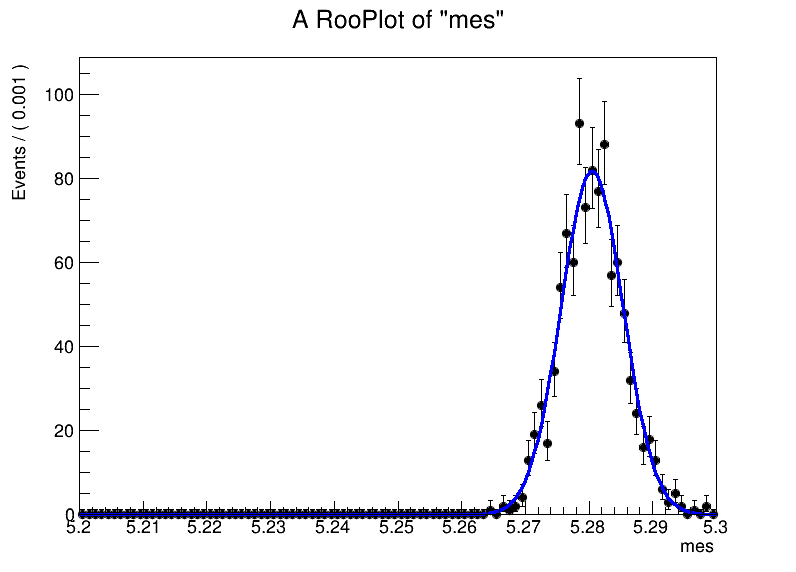

In [12]:
# Definimos as variáveis e a PDF Gaussiana.
# Make pdf
mes = RooRealVar("mes", "mes", 5.20, 5.30)
mean = RooRealVar("mean", "mean", 5.28, 5.20, 5.30)
sigma = RooRealVar("sigma", "sigma", 0.005, 0.001, 0.05)
model = RooGaussian("model", "model", mes, mean, sigma)

# Criamos um RooWorkspace chamado w e importamos a PDF para ele.
# Import pdf into workspace
w = RooWorkspace("w")
getattr(w, "import")(model)

# Geramos um conjunto de dados (toy MC) usando a PDF do workspace.
# Generate some toy data
d = w.pdf("model").generate(w.var("mes"), 1000)

# Perform unbinned ML fit to data
# Realizamos um ajuste de máxima verossimilhança (ML) não binário nos dados.
w.pdf("model").fitTo(d)

# Plot data and pdf
# Plotamos os dados e a PDF no mesmo gráfico.
frame = w.var("mes").frame()
d.plotOn(frame)
w.pdf("model").plotOn(frame)
frame.Draw()

# Create canvas and draw
canvas = TCanvas("canvas", "canvas", 800, 600)
canvas.cd()
frame.Draw()
canvas.Draw()


**Exemplo 07:** Usando o Factory

Ref.:https://www.nikhef.nl/~verkerke/ferrara/ex2.C

[#1] INFO:Plotting -- RooTreeData::plotOn: plotting 2360 events out of 10000 total events
[#1] INFO:Plotting -- RooAbsReal::plotOn(sig) plot on t represents a slice in (mixState)
[#1] INFO:Plotting -- RooAbsReal::plotOn(sig) plot on t integrates over variables (tagFlav)
[#1] INFO:Plotting -- RooTreeData::plotOn: plotting 7640 events out of 10000 total events
[#1] INFO:Plotting -- RooAbsReal::plotOn(sig) plot on t represents a slice in (mixState)
[#1] INFO:Plotting -- RooAbsReal::plotOn(sig) plot on t integrates over variables (tagFlav)
[#1] INFO:Plotting -- RooAbsReal::plotAsymOn(sig) plot on t projects variables (tagFlav)


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


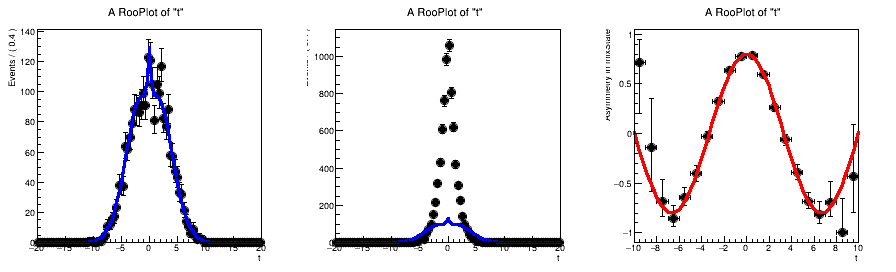

In [15]:

# Criar um RooWorkspace
w = RooWorkspace("w")

# Definir variáveis e categorias
#Aqui, estamos definindo variáveis (RooRealVar) como t, categorias (RooCategory) como mixState e tagFlav, e definindo tipos para as categorias.
t = RooRealVar("t", "t", -20, 20)
mixState = RooCategory("mixState", "mixState")
mixState.defineType("mixed", -1)
mixState.defineType("unmixed", 1)
tagFlav = RooCategory("tagFlav", "tagFlav")
tagFlav.defineType("B0", 1)
tagFlav.defineType("B0bar", -1)

# Definir PDFs
# Aqui, estamos criando PDFs utilizando a sintaxe do ROOT.
# A primeira linha cria um modelo chamado TruthModel e a segunda linha cria um modelo de decaimento chamado sig,
# ambos utilizando as variáveis, categorias e parâmetros definidos anteriormente.
w.factory("TruthModel::tm(t[-20,20])")
w.factory("BMixDecay::sig(t,mixState[mixed=-1,unmixed=1],tagFlav[B0=1,B0bar=-1],tau[1.54,1,2],dm[0.472,0.1,0.8],w[0.1,0,0.5],dw[0],tm)")

# Gerar um conjunto de dados
#Aqui, estamos gerando um conjunto de dados (RooDataSet) utilizando o modelo sig definido no RooWorkspace.
data = w.pdf("sig").generate(RooArgSet(t, mixState, tagFlav), 10000)

# Criar plots
# Aqui, estamos criando três frames para os plots.
# No primeiro e segundo frames, estamos plotando dados filtrados pelo estado mixed e unmixed, respectivamente.
# No terceiro frame, estamos plotando a assimetria dos dados em relação ao estado mixState, com a linha colorida em vermelho (kRed).
frame1 = t.frame()
data.plotOn(frame1, RooFit.Cut("mixState==mixState::mixed"))
w.pdf("sig").plotOn(frame1, RooFit.Slice(mixState, "mixed"))

frame2 = t.frame()
data.plotOn(frame2, RooFit.Cut("mixState==mixState::unmixed"))
w.pdf("sig").plotOn(frame2, RooFit.Slice(mixState, "unmixed"))

frame3 = t.frame(-10, 10, 20)
data.plotOn(frame3, RooFit.Asymmetry(mixState))
w.pdf("sig").plotOn(frame3, RooFit.Asymmetry(mixState), RooFit.LineColor(kRed))

# Criar e dividir o canvas
canvas = TCanvas("c", "c", 900, 300)
canvas.Divide(3)
canvas.cd(1)
frame1.Draw()
canvas.cd(2)
frame2.Draw()
canvas.cd(3)
frame3.Draw()

# Exibir o canvas
canvas.Draw()
